In [104]:
%load_ext autoreload
%autoreload 2
from model.model import OpinionModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
! ls

Deffuant model.ipynb __pycache__          model
README.md            experiment_setup.py


In [116]:
my_model = OpinionModel(num_agents=200,
                        mu=0.5,
                        init_u=1.2, extremist_ratio=0.25, d=.0, 
                        extremist_u=0.1, regime="all",
                        max_iter=1e+5,
                        eps=1e-4
                       )

In [117]:
my_model.schedule._agents[0].x

-0.998856207744113

In [118]:
my_model.run_model()

Elapsed 0 steps
Elapsed 100 steps
Elapsed 200 steps


In [119]:
my_model.schedule._agents[0].x

-0.8655415823786146

In [120]:
set(my_model.datacollector.get_agent_vars_dataframe().tail(200)['Opinion'].apply(lambda x: round(x, 1)))

{-0.9, 0.0, 0.9}

In [121]:
my_model.schedule.steps

262

In [122]:
import numpy as np

In [123]:
my_model.get_clusters()

{-0.9: 109, 0.0: 2, 0.9: 89}

In [124]:
my_model.check_clusters_convergence()

0.49564444444444455

In [125]:
import seaborn as sns

<AxesSubplot:xlabel='Step', ylabel='Opinion'>

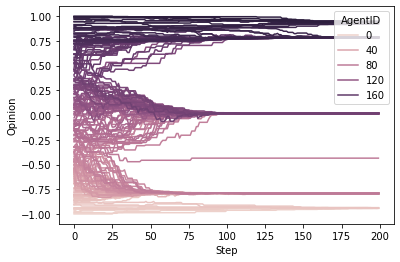

In [93]:
import seaborn as sns
opinions = my_model.datacollector.get_agent_vars_dataframe().reset_index()
sns.lineplot(data=opinions, x='Step', y='Opinion', hue='AgentID')

In [16]:
df = my_model.datacollector.get_agent_vars_dataframe().reset_index()

In [17]:
df[df['AgentID'] == 10]

,Step,AgentID,Opinion,Uncertainty,Delta X,Delta U
10,0,10,-0.818181,0.5,0,0


In [86]:
from mesa.batchrunner import batch_run

In [ ]:
params = {
    num_agents: [1000],
    mu=[],
    init_u=0.5, extremist_ratio=0.3, d=0.2, 
    extremist_u=0.05, regime="p2p",
    max_iter=1e+5,
    eps=1e-8
}

In [ ]:
batch_run(OpinionModel, )